# Spam Message Classification

# 1) Data Preprocessing

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
# data file spam.tsv

In [61]:
df = pd.read_csv('spam.tsv', sep='\t') 

In [62]:
df.head()  # display first five record 

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


The data sheet with four columns: "message," "label," "length," and a fourth column that records the number of punctuation marks in each individual message in the "message" column. Each message in the "message" column is associated with a label in the "label" column, which specifies whether the message is classified as "ham" or "spam." The "length" column records the total number of characters in each message. Finally, the fourth column records the number of punctuation marks in each message.

In [63]:
df.isna().sum() #  cheak for missing values in data set

label      0
message    0
length     0
punct      0
dtype: int64

In [64]:
df.tail()    # display last five rows of data

,label,message,length,punct
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1
5571,ham,Rofl. Its true to its name,26,1


In [65]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [66]:
df['label'].value_counts()/ (len(df))  # percentage of how many record is ham or spam in data set

ham     0.865937
spam    0.134063
Name: label, dtype: float64

The dataset is imbalanced, with 86% of the data classified as ham and only 13% classified as spam. Due to this imbalance, it may not be advisable to train on the complete dataset as it could introduce bias.

In [67]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

If you want to reduce the number of ham data points, you can randomly select a subset of the ham data and remove them from the dataset until you have a comparable number of ham and spam data points. However, it's important to note that reducing the number of spam data points can negatively impact the performance of any machine learning models you train on the new dataset, as you are essentially throwing away potentially useful information.

Alternatively, you could try oversampling the ham data by duplicating existing ham data points or generating new ones using techniques like data augmentation. This would allow you to create a balanced dataset while retaining all of the original data points.

Ultimately, the best approach depends on the specific goals of your analysis and the characteristics of your data.

In [68]:
ham = df[df['label'] == 'ham']
spam = df[df['label'] == 'spam']

In [69]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [70]:
ham = ham.sample(spam.shape[0])

In [71]:
ham.shape, spam.shape

((747, 4), (747, 4))

In [72]:
data = ham.append(spam, ignore_index=True)

In [73]:
data.shape

(1494, 4)

In [74]:
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

In [75]:
data.head()

,label,message,length,punct
0,ham,my ex-wife was not able to have kids. Do you w...,63,3
1,ham,"Sir, hope your day is going smoothly. i really...",243,7
2,ham,Gd luck 4 ur exams :-),22,3
3,ham,Probably gonna swing by in a wee bit,36,0
4,ham,I know dat feelin had it with Pete! Wuld get w...,85,3


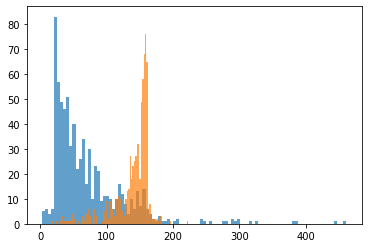

In [76]:
plt.hist(data[data['label'] == 'ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['length'], bins = 100, alpha = 0.7)
plt.show()

The initial interpretation involves visualizing the data to distinguish between spam and ham messages based on message length. A basic rule-of-thumb is messages longer than 100 characters are labeled as spam, and messages shorter than 100 characters are labeled as ham. However, this is a simplistic interpretation and may not be accurate in all cases.

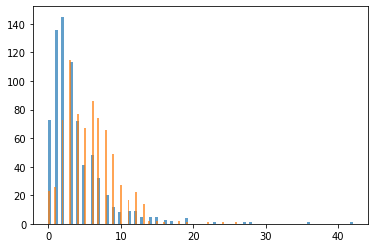

In [77]:
plt.hist(data[data['label'] == 'ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label'] == 'spam']['punct'], bins = 100, alpha = 0.7)
plt.show()

The punctuation marks are plotted on the x-axis in the given figure, but it is difficult to make a decision based solely on visualization in this case.

In [78]:
data

,label,message,length,punct
0,ham,my ex-wife was not able to have kids. Do you w...,63,3
1,ham,"Sir, hope your day is going smoothly. i really...",243,7
2,ham,Gd luck 4 ur exams :-),22,3
3,ham,Probably gonna swing by in a wee bit,36,0
4,ham,I know dat feelin had it with Pete! Wuld get w...,85,3
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


Great, now that our data is ready, we can proceed with splitting it into training and test datasets. This is an important step in machine learning where we divide our data into two sets: the training dataset is used to train our machine learning model, and the test dataset is used to evaluate its performance. By splitting our data into these two sets, we can ensure that our model is not simply memorizing the training data, but can generalize to new, unseen data.

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test =  train_test_split(data['message'], data['label'], test_size = 0.3, random_state =0, shuffle = True)

In [81]:
1494 * 0.3

448.2

In [82]:
X_train.shape

(1045,)

In [83]:
X_test.shape

(449,)

# 2) Building the Model (Random Forest)

In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [85]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])

In [86]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

# 3) Predicting the results (Random Forest)

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
y_test, y_pred

(799     spam
 1047    spam
 1436    spam
 54       ham
 793     spam
         ... 
 824     spam
 822     spam
 644      ham
 1034    spam
 1356    spam
 Name: label, Length: 449, dtype: object,
 array(['spam', 'spam', 'spam', 'spam', 'spam', 'spam', 'ham', 'ham',
        'ham', 'ham', 'spam', 'ham', 'ham', 'spam', 'spam', 'spam', 'spam',
        'ham', 'spam', 'spam', 'spam', 'ham', 'spam', 'spam', 'ham',
        'spam', 'ham', 'ham', 'spam', 'spam', 'ham', 'spam', 'spam',
        'spam', 'spam', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
        'spam', 'ham', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam', 'ham',
        'ham', 'ham', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'ham',
        'ham', 'ham', 'ham', 'spam', 'spam', 'ham', 'ham', 'ham', 'spam',
        'spam', 'spam', 'spam', 'spam', 'ham', 'ham', 'spam', 'spam',
        'ham', 'ham', 'ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'spam',
        'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham', 'ham', 'spam',
   

Once we have trained our machine learning model on the training dataset, we can evaluate its performance on the test dataset using various metrics such as accuracy_score, confusion_matrix, and classification_report.

The accuracy_score is a measure of the percentage of correctly predicted labels. It is calculated by dividing the number of correctly predicted labels by the total number of labels.

The confusion_matrix is a table that shows the number of true positives, true negatives, false positives, and false negatives for each class. It is a useful tool for evaluating the performance of a classification model.

The classification_report provides a summary of various metrics such as precision, recall, and F1-score for each class. These metrics provide a more detailed understanding of the performance of our model.

Overall, these metrics can help you determine the effectiveness of our machine learning model and identify areas for improvement.

In [89]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [90]:
accuracy_score(y_test, y_pred)

0.9398663697104677

In [91]:
0.9465478841870824 * 449

425.0

In [92]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 22, 200]])

In [93]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       227
        spam       0.98      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



# 4) Building the Model (SVM)

In [94]:
from sklearn.svm import SVC

In [95]:
svm = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", SVC(C = 100, gamma='auto'))])

In [96]:
svm.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', SVC(C=100, gamma='auto'))])

# 5) Predicting the results (SVM)

In [97]:
y_pred = svm.predict(X_test)

In [98]:
accuracy_score(y_test, y_pred)

0.9376391982182628

In [99]:
confusion_matrix(y_test, y_pred)

array([[222,   5],
       [ 23, 199]])

In [100]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.98      0.94       227
        spam       0.98      0.90      0.93       222

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



 To test our trained random forest model on a hand-crafted input dataset, we can follow these steps:

Prepare our input data in the same format as your original dataset, with the same features and data types.

Load your trained random forest model into memory.

Use the predict() method of the model to generate a prediction for our input data. The output of this method will be the predicted label (ham or spam) for each input data point.

In [101]:
test1 = ['Hello, You are learning natural Language Processing']
test2 = ['Hope you are doing good and learning new things !']
test3 = ['Congratulations, You won a lottery ticket worth $1 Million ! To claim call on 446677']

In [102]:
print(classifier.predict(test1))
print(classifier.predict(test2))
print(classifier.predict(test3))

['ham']
['ham']
['spam']


To test our trained SVM model on a hand-crafted input dataset, we can follow these steps:

Prepare our input data in the same format as your original dataset, with the same features and data types.

Load our trained SVM model into memory.

Use the predict() method of the model to generate a prediction for your input data. The output of this method will be the predicted label (ham or spam) for each input data point.

In [103]:
print(svm.predict(test1))
print(svm.predict(test2))
print(svm.predict(test3))

['ham']
['ham']
['spam']
